
# Pythonで学ぶ高度な画像処理

このノートブックでは、以下の画像処理テクニックを学びます：

1. 画像の二値化
2. ガンマ補正（スライドバー付き）
3. 大津の二値化
4. 画像の拡大縮小
5. アフィン変換
6. 空間フィルタリング
7. 周波数フィルタリング

まずは必要なライブラリをインストールし、準備を整えましょう！


In [2]:

# 必要なライブラリをインストール（初回のみ必要）
# !pip install opencv-python matplotlib numpy

# 必要なライブラリをインポート
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


In [4]:

# 二値化処理
image_path = "Lenna.jpg"  # 任意の画像ファイルを指定
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 二値化処理を行う関数
def binarize(threshold):
    """
    二値化処理を行なう
    閾値は threshold で指定

    Parameters
    ----------
    threshold : int
        二値化の閾値
    
    Returns
    -------
    None
    """
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binarized Image")
    plt.axis("off")
    plt.show()

# スライドバー+二値化画像表示
interact(binarize, threshold=(0, 255, 1))

"""
説明：
thresholdの値よりも大きい画素値を255に、それ以外を0に変換することで二値化処理を行っています。
"""


interactive(children=(IntSlider(value=127, description='threshold', max=255), Output()), _dom_classes=('widget…

'\n説明：\nthresholdの値よりも大きい画素値を255に、それ以外を0に変換することで二値化処理を行っています。\n'

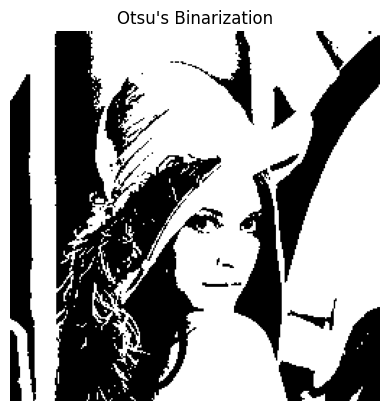

In [ ]:

# 大津の二値化
_, otsu_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(otsu_image, cmap='gray')
plt.title("Otsu's Binarization")
plt.axis("off")
plt.show()

"""
説明：
大津の二値化は、画像全体の分散が最小になるように二値化閾値を決定する手法です。
大津の二値化を使うことで、閾値を自動で決定することができます。
"""


In [ ]:

# ガンマ補正
def gamma_correction(gamma=3.0):
    image_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    gamma_corrected = np.array(255 * (image_rgb / 255) ** (1/gamma), dtype='uint8')
    plt.imshow(gamma_corrected)
    plt.title(f"Gamma Correction (Gamma={gamma})")
    plt.axis("off")
    plt.show()

# スライダー付きガンマ補正
interact(gamma_correction, gamma=(0.1, 5.0, 0.1))

"""
説明：
ガンマ補正は、画像の鮮明さを調整するための処理です。
ガンマ値が1より大きいと画像が明るくなり、1より小さいと暗くなります。
"""

interactive(children=(FloatSlider(value=3.0, description='gamma', max=5.0, min=0.1), Output()), _dom_classes=(…

'\n説明：\nガンマ補正は、画像の鮮明さを調整するための処理です。\n'

下に表示されている画像の縦横サイズは、512 x 512


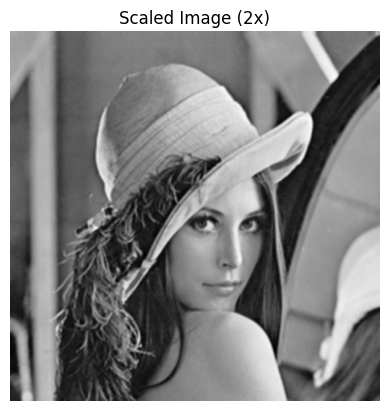

In [ ]:

# 画像の拡大縮小
expansion_ratio = 2  # 拡大率(大きい値を指定するととんでもない時間がかかるので注意)
scaled_image = cv2.resize(image, (int(image.shape[1] * expansion_ratio), int(image.shape[0] * expansion_ratio)))  # 2倍に拡大

# 画像のサイズを表示
print(f"下に表示されている画像の縦横サイズは、{scaled_image.shape[1]} x {scaled_image.shape[0]}")

plt.imshow(scaled_image, cmap='gray')
plt.title(f"Scaled Image ({expansion_ratio}x)")
plt.axis("off")
plt.show()


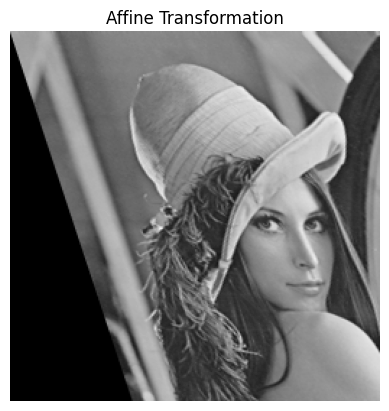

In [ ]:

# アフィン変換
rows, cols = image.shape
points1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
points2 = np.float32([[0, 0], [cols - 1, 0], [cols * 0.33, rows - 1]])
matrix = cv2.getAffineTransform(points1, points2)
affine_image = cv2.warpAffine(image, matrix, (cols, rows))

plt.imshow(affine_image, cmap='gray')
plt.title("Affine Transformation")
plt.axis("off")
plt.show()

"""
説明：
アフィン変換は、画像の回転、平行移動、拡大縮小を行う処理です。
アフィン変換を使うことで、画像の歪みを修正することができます。
https://qiita.com/koshian2/items/c133e2e10c261b8646bf
上のURLがアフィン変換の詳細な説明です。
"""

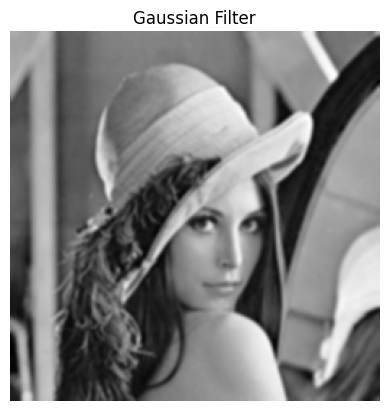

In [ ]:

# 空間フィルタリング（ガウシアンフィルタ）
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)

plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filter")
plt.axis("off")
plt.show()

"""
説明：
ガウシアンフィルタは、画像のノイズを除去するためのフィルタです。
ガウシアンフィルタを使うことで、画像の平滑化を行うことができます。
"""


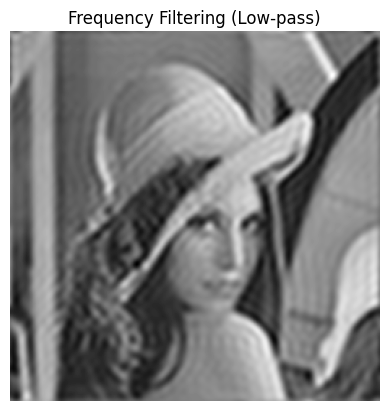

In [ ]:

# 周波数フィルタリング（低周波フィルタ）
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# マスク作成
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# フィルタ適用
filtered_dft = dft_shift * mask
dft_ishift = np.fft.ifftshift(filtered_dft)
filtered_image = cv2.idft(dft_ishift)
filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

plt.imshow(filtered_image, cmap='gray')
plt.title("Frequency Filtering (Low-pass)")
plt.axis("off")
plt.show()

"""
説明：
周波数フィルタリングは、画像の周波数成分を操作する処理です。
低周波フィルタを使うことで、画像の平滑化を行うことができます。
"""
